<a href="https://colab.research.google.com/github/EasonChen78/machine_learning/blob/main/20230320_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# from sklearn.datasets import load_diabetes
from urllib.request import urlretrieve
import pandas as pd
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
urlretrieve(url, "diabetes.txt")
df = pd.read_csv("diabetes.txt", encoding="utf-8", sep="\t")
df.to_csv("diabetes.csv", index=False)
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop(["Y"], axis=1)
y = df["Y"]
np_x = np.array(x)
np_y = np.array(y)
x_train, x_test, y_train, y_test = train_test_split(np_x, np_y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [19]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'BMI <= 27.25\nsquared_error = 5967.492\nsamples = 397\nvalue = 152.778'),
 Text(0.25, 0.625, 'S5 <= 4.6\nsquared_error = 3700.19\nsamples = 244\nvalue = 119.877'),
 Text(0.125, 0.375, 'S3 <= 55.5\nsquared_error = 2126.962\nsamples = 152\nvalue = 96.822'),
 Text(0.0625, 0.125, 'squared_error = 2748.985\nsamples = 78\nvalue = 109.833'),
 Text(0.1875, 0.125, 'squared_error = 1104.799\nsamples = 74\nvalue = 83.108'),
 Text(0.375, 0.375, 'S5 <= 4.909\nsquared_error = 3970.401\nsamples = 92\nvalue = 157.967'),
 Text(0.3125, 0.125, 'squared_error = 3749.755\nsamples = 49\nvalue = 139.714'),
 Text(0.4375, 0.125, 'squared_error = 3409.527\nsamples = 43\nvalue = 178.767'),
 Text(0.75, 0.625, 'BP <= 101.5\nsquared_error = 5103.886\nsamples = 153\nvalue = 205.248'),
 Text(0.625, 0.375, 'S6 <= 98.5\nsquared_error = 5148.744\nsamples = 80\nvalue = 177.325'),
 Text(0.5625, 0.125, 'squared_error = 3996.5\nsamples = 56\nvalue = 156.768'),
 Text(0.6875, 0.125, 'squared_error = 4550.45

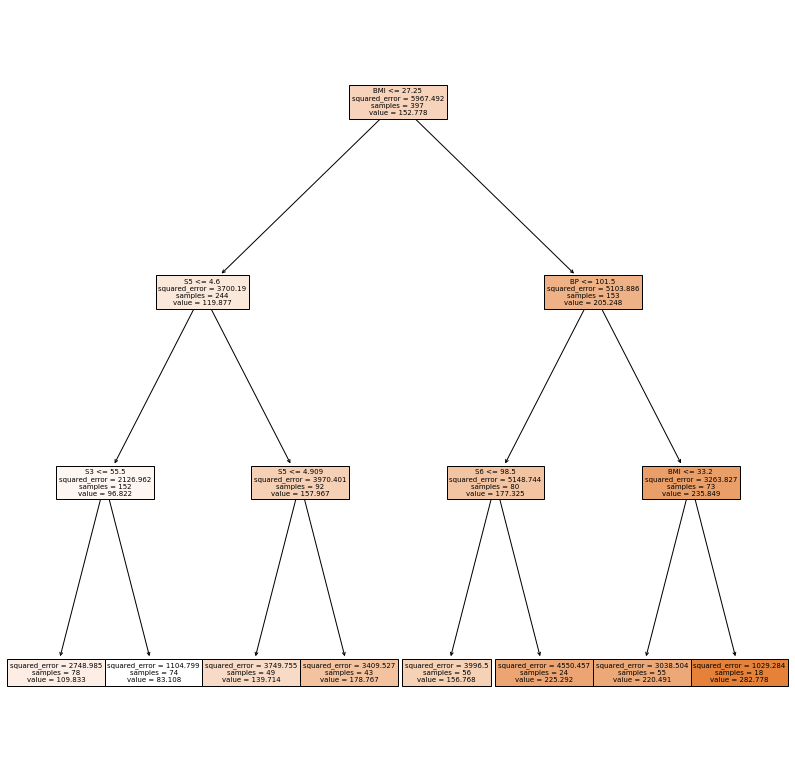

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
plot_tree(reg, feature_names=x.columns, filled=True)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [47, 45, 43]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 88\nvalue = [0, 45, 43]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.187\nsamples = 48\nvalue = [0, 5, 43]\nclass = virginica')]

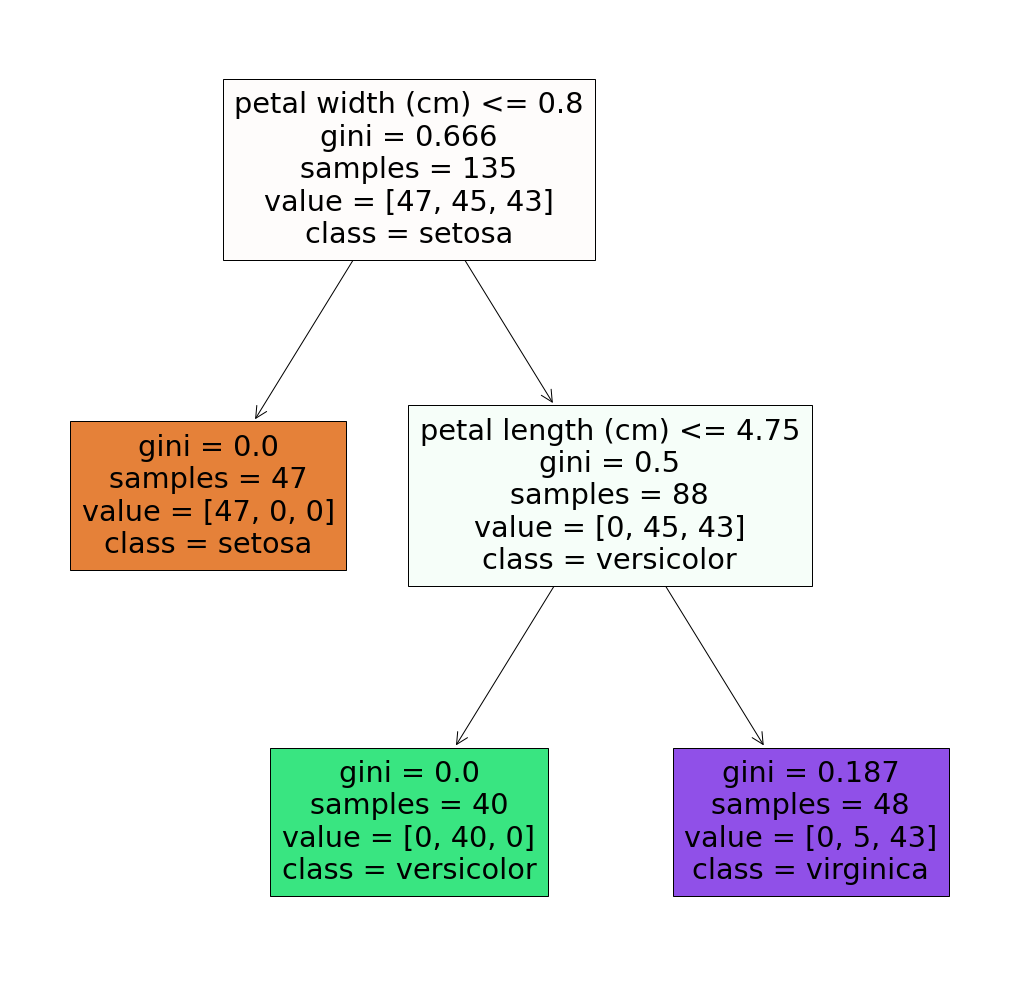

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 18))
plot_tree(reg,
     feature_names=x.columns, 
     class_names=iris["target_names"],
     filled=True
     ) 

In [ ]:
x.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [ ]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
print(accuracy_score(y_test, pre))

0.8666666666666667


In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre), index=iris["target_names"], columns=iris["target_names"])

,setosa,versicolor,virginica
setosa,3,0,0
versicolor,0,4,1
virginica,0,1,6
